In [105]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exchangerates.csv')

df['date'] = pd.to_datetime(df['date'])
df_filtered = df[df['date'].dt.year.isin([2022, 2023, 2024])]

In [106]:
# Select a currency
selected_currency = 'myr_usd'

In [107]:
# percent change from 2022 to 2023
df_2023 = df_filtered[df_filtered['date'].dt.year == 2023][['date', selected_currency]]
df_2023['%_change'] = df_filtered[df_filtered['date'].dt.year == 2023][selected_currency].pct_change() * 100

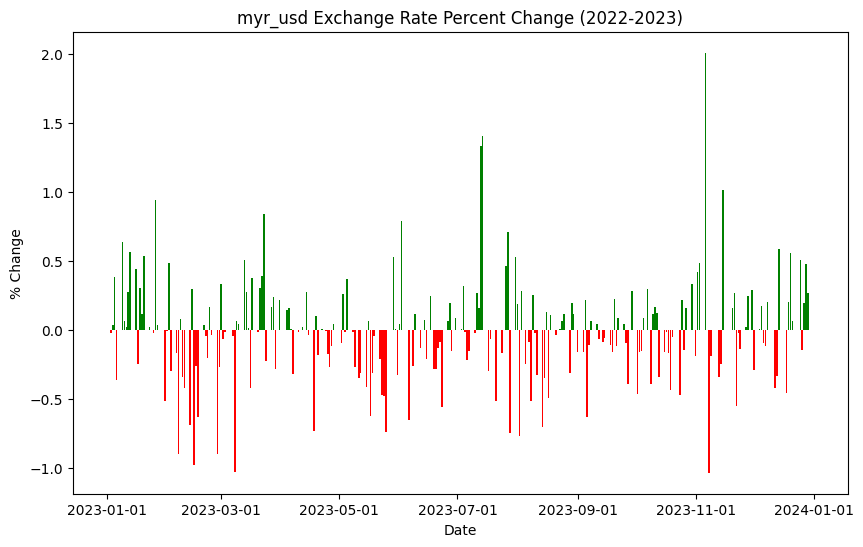

In [108]:
# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_2023['date'], df_2023['%_change'], color=['red' if x < 0 else 'green' for x in percent_change])

ax.set_title(f'{selected_currency} Exchange Rate Percent Change (2022-2023)')
ax.set_xlabel('Date')
ax.set_ylabel('% Change')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


In [109]:
# percent change from 2023 to 2024
df_2024 = df_filtered[df_filtered['date'].dt.year == 2023][['date', selected_currency]]
df_2024['%_change'] = df_filtered[df_filtered['date'].dt.year == 2024][selected_currency].pct_change() * 100

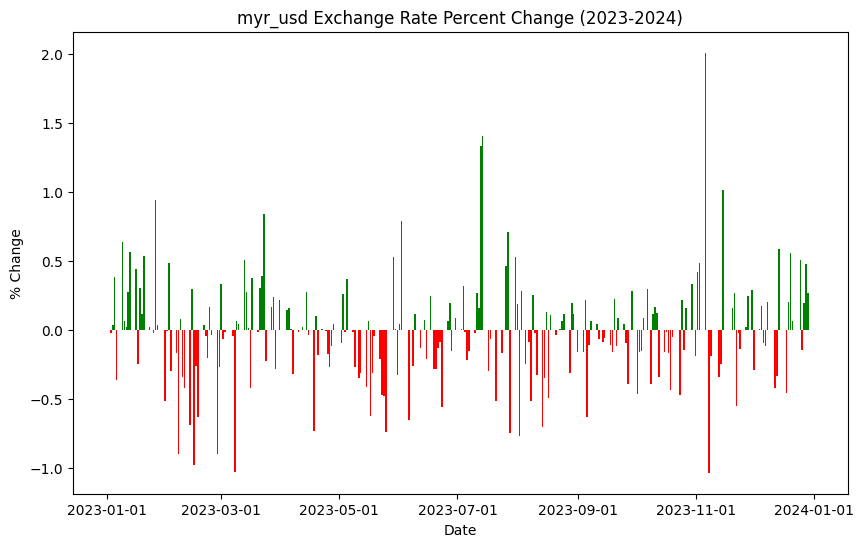

In [110]:
# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_2024['date'], df_2023['%_change'], color=['red' if x < 0 else 'green' for x in percent_change])

ax.set_title(f'{selected_currency} Exchange Rate Percent Change (2023-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('% Change')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


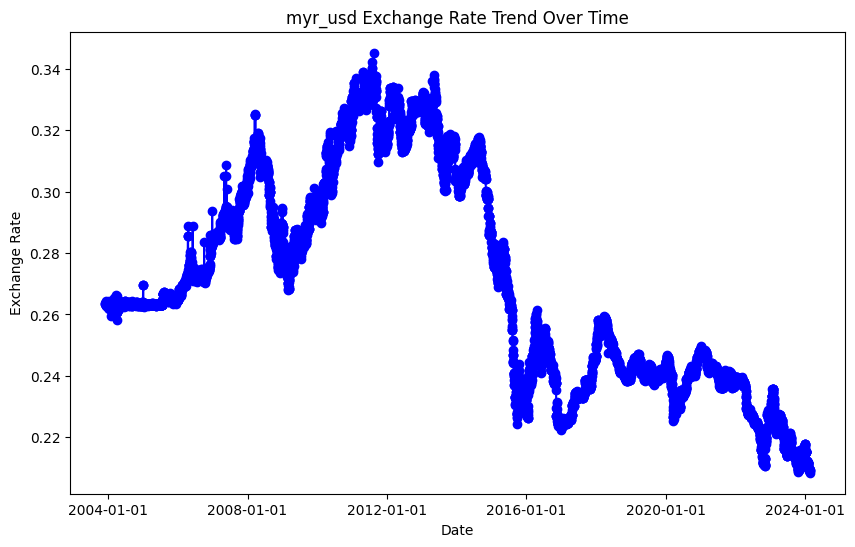

In [111]:
# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df[selected_currency], marker='o', linestyle='-', color='b')

ax.set_title(f'{selected_currency} Exchange Rate Trend Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#Dash Trial

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# Load your dataset
df = pd.read_csv('exchangerates.csv')

# Filter data for the relevant years
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[df['date'].dt.year.isin([2022, 2023, 2024])]

# Create Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Percent Change in Exchange Rate (2022-2023)"),
    
    dcc.Dropdown(
        id='currency-dropdown',
        options=[
            {'label': currency, 'value': currency} for currency in df.columns[1:]
        ],
        value='myr_usd',
        multi=False,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='exchange-rate-percent-change'),
])

# Callback
@app.callback(
    Output('exchange-rate-percent-change', 'figure'),
    [Input('currency-dropdown', 'value')]
)
def update_plot(selected_currency):
    # Calculate percent change from 2022 to 2023
    df_change = df_filtered.pivot(index='date', columns='date', values=selected_currency)
    percent_change = ((df_change[2023] - df_change[2022]) / df_change[2022]) * 100

    # Create a bar chart for percent change
    fig = {
        'data': [
            {
                'x': percent_change.index,
                'y': percent_change,
                'type': 'bar',
                'name': f'% Change from 2022 to 2023',
            },
        ],
        'layout': {
            'title': f'{selected_currency} Exchange Rate Percent Change (2022-2023)',
            'xaxis': {'title': 'Date'},
            'yaxis': {'title': '% Change'},
        }
    }
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [23]:
import warnings
warnings.filterwarnings("ignore")